## Understanding the OLIST Data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set(rc={'figure.figsize':(16,9)})
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit




pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('max_colwidth', 400)

In [2]:
cust = pd.read_csv('~/Data_mining/DataArchives/olist_customers_dataset.csv') #customer data cust id PK
loc = pd.read_csv('~/Data_mining/DataArchives/olist_geolocation_dataset.csv') #location details zip code PK
order = pd.read_csv('~/Data_mining/DataArchives/olist_order_items_dataset.csv') #orders order id PK
pay = pd.read_csv('~/Data_mining/DataArchives/olist_order_payments_dataset.csv')#payment info Payment id PK
review = pd.read_csv('~/Data_mining/DataArchives/olist_order_reviews_dataset.csv') #reviews review id PK
ord_cust = pd.read_csv('~/Data_mining/DataArchives/olist_orders_dataset.csv') # order and cust id PK
product = pd.read_csv('~/Data_mining/DataArchives/olist_products_dataset.csv')# product id PK
sellers = pd.read_csv('~/Data_mining/DataArchives/olist_sellers_dataset.csv')# seller id PK
prd_name = pd.read_csv('~/Data_mining/DataArchives/product_category_name_translation.csv') #translation data

In [3]:
cust.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [4]:
loc.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


In [5]:
order.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [6]:
pay.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [7]:
review.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [8]:
ord_cust.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [9]:
product.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [10]:
sellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [11]:
prd_name.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


#### Merge all DataFrames

In [12]:
temp1 = order.merge(pay,left_on='order_id',right_on='order_id')
temp2 = temp1.merge(review,left_on='order_id',right_on='order_id')
temp3 = temp2.merge(ord_cust,left_on='order_id',right_on='order_id')
temp4 = temp3.merge(product,left_on='product_id',right_on='product_id')
temp5 = temp4.merge(sellers,left_on='seller_id',right_on='seller_id')
ord_final = temp5.merge(prd_name,left_on='product_category_name',right_on='product_category_name')

In [13]:
ord_final.to_csv('~/Data_mining/DataGenerated/ord_final.csv',index=False)

In [14]:
seller_final = sellers.merge(loc,left_on='seller_zip_code_prefix',right_on='geolocation_zip_code_prefix')

In [15]:
ord_final.isnull().sum()

order_id                              0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
review_id                             0
review_score                          0
review_comment_title             102585
review_comment_message            66703
review_creation_date                  0
review_answer_timestamp               0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1213
order_delivered_customer_date      2515
order_estimated_delivery_date         0
product_category_name                 0


In [16]:
ord_final = ord_final.drop(ord_final.loc[ord_final['product_weight_g'].isna()].index)

In [17]:
ord_final.loc[~(ord_final['order_approved_at'].isna())]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,72.19,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.90,17.96,1,boleto,1,73.86,b11cba360bbe71410c291b764753d37f,5,NaN,"lannister como sempre, entregou certinho e dentro do prazo. recomendo muito",2017-07-14 00:00:00,2017-07-17 12:50:07,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26 00:00:00,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.90,18.33,1,credit_card,2,83.23,af01c4017c5ab46df6cc810e069e654a,4,super recomendo,carrinho muito bonito,2018-06-05 00:00:00,2018-06-06 21:41:12,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07 00:00:00,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.90,16.17,1,credit_card,3,75.07,8304ff37d8b16b57086fa283fe0c44f8,5,NaN,NaN,2017-08-10 00:00:00,2017-08-13 03:35:17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25 00:00:00,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.90,13.29,1,credit_card,4,72.19,426f43a82185969503fb3c86241a9535,5,NaN,NaN,2017-08-25 00:00:00,2017-08-28 00:51:18,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01 00:00:00,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116576,2c12150c742ae2fa48bc703964c16c5f,1,2b54fb9a4acf707537eb53eb2458c241,ef728fa1f17436c91ed1ccd03dcf9631,2018-08-02 17:50:12,57.90,19.60,1,credit_card,7,77.50,6b7c670a784ae6d3f17ee1d4b28d197e,5,NaN,NaN,2018-08-04 00:00:00,2018-08-05 22:10:19,ab0cf72dfe0538a63a57d6905ccb7b57,delivered,2018-07-28 17:55:27,2018-07-29 18:30:31,2018-07-30 14:54:00,2018-08-03 17:46:46,2018-08-16 00:00:00,artes_e_artesanato,53.0,923.0,5.0,1000.0,25.0,25.0,25.0,17201,jau,SP,arts_and_craftmanship
116577,2ef4a11b6e24fdfbb43b92cb5f95edff,1,9c313adb4b38a55b092f53f83f78be9e,ef728fa1f17436c91ed1ccd03dcf9631,2018-07-30 09:17:39,19.00,12.86,1,credit_card,1,84.63,ad0de1dda4fa03e8efb68c481b31ebf8,3,A FOLHA NAO FRISA,"Um dos frisadores que comprei, especifica

In [18]:
ord_final.dtypes

order_id                          object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
payment_sequential                 int64
payment_type                      object
payment_installments               int64
payment_value                    float64
review_id                         object
review_score                       int64
review_comment_title              object
review_comment_message            object
review_creation_date              object
review_answer_timestamp           object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
product_category

In [19]:
ord_final['shipping_limit_date'] = pd.to_datetime(ord_final['shipping_limit_date'])
ord_final['review_creation_date'] = pd.to_datetime(ord_final['review_creation_date'])
ord_final['order_purchase_timestamp'] = pd.to_datetime(ord_final['order_purchase_timestamp'])
ord_final['order_approved_at'] = pd.to_datetime(ord_final['order_approved_at'])
ord_final['order_delivered_carrier_date'] = pd.to_datetime(ord_final['order_delivered_carrier_date'])
ord_final['order_delivered_customer_date'] = pd.to_datetime(ord_final['order_delivered_customer_date'])
ord_final['order_estimated_delivery_date'] = pd.to_datetime(ord_final['order_estimated_delivery_date'])



In [20]:
ord_final.dtypes

order_id                                 object
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
payment_sequential                        int64
payment_type                             object
payment_installments                      int64
payment_value                           float64
review_id                                object
review_score                              int64
review_comment_title                     object
review_comment_message                   object
review_creation_date             datetime64[ns]
review_answer_timestamp                  object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetim

In [21]:
extra = np.mean(ord_final['order_approved_at'] - ord_final['order_purchase_timestamp'])

In [22]:
ord_final['order_approved_at'] = np.where(ord_final['order_approved_at'].isna(),
                                          ord_final['order_purchase_timestamp']+extra,ord_final['order_approved_at'])

In [23]:
extra1 = np.mean(ord_final['order_delivered_carrier_date'] - ord_final['order_purchase_timestamp'])

In [24]:
ord_final['order_delivered_carrier_date'] = np.where(ord_final['order_delivered_carrier_date'].isna(),
                                          ord_final['order_purchase_timestamp']+extra1,ord_final['order_delivered_carrier_date'])

In [25]:
extra2 = np.mean(ord_final['order_delivered_customer_date'] - ord_final['order_purchase_timestamp'])

In [26]:
ord_final['order_delivered_customer_date'] = np.where(ord_final['order_delivered_customer_date'].isna(),
                                          ord_final['order_purchase_timestamp']+extra2,ord_final['order_delivered_customer_date'])

In [27]:
ord_final['review_comment_title'] = np.where(ord_final['review_comment_title'].isna(),'No Comments',ord_final['review_comment_title'])
ord_final['review_comment_message'] = np.where(ord_final['review_comment_message'].isna(),'No Comments',ord_final['review_comment_message'])


In [28]:
ord_final.isnull().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g    

#### Visualize Orders Data

In [29]:
ord_final.describe(include='all',datetime_is_numeric=True)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
count,116580,116580.000000,116580,116580,116580,116580.000000,116580.00000,116580.000000,116580,116580.000000,116580.000000,116580,116580.000000,116580,116580,116580,116580,116580,116580,116580,116580,116580,116580,116580,116580,116580.000000,116580.000000,116580.000000,116580.000000,116580.00000,116580.000000,116580.000000,116580.000000,116580,116580,116580
unique,97254,NaN,32327,3033,NaN,NaN,NaN,NaN,4,NaN,NaN,97052,NaN,4550,35910,NaN,96896,97254,7,NaN,NaN,NaN,NaN,NaN,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,604,23,71
top,895ab968e7bb0d5659d16cd74cd1650c,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,NaN,NaN,NaN,NaN,credit_card,NaN,NaN,eef5dbca8d37dfce6db7d7b16dd0525e,NaN,No Comments,No Comments,NaN,2017-08-17 22:17:55,270c23a11d024a44c896d1894b261a83,delivered,NaN,NaN,NaN,NaN,NaN,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sao paulo,SP,bed_bath_table
freq,63,NaN,536,2155,NaN,NaN,NaN,NaN,86011,NaN,NaN,63,NaN,102584,66702,NaN,63,63,114066,NaN,NaN,NaN,NaN,NaN,11990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29056,83121,11990
mean,NaN,1.196955,NaN,NaN,2018-01-06 16:17:21.928726784,120.735815,20.06249,1.093369,NaN,2.949554,172.894920,NaN,4.017499,NaN,NaN,2018-01-12 14:57:52.125579008,NaN,NaN,NaN,2017-12-31 00:42:27.267704320,2017-12-31 11:12:34.714438144,2018-01-03 07:33:19.559018240,2018-01-12 12:20:54.396113920,2018-01-23 21:41:41.657230848,NaN,48.766221,785.948653,2.204984,2115.560422,30.31858,16.645891,23.116898,24504.361366,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.00000,1.000000,NaN,0.000000,0.000000,NaN,1.000000,NaN,NaN,2016-10-15 00:00:00,NaN,NaN,NaN,2016-09-04 21:15:19,2016-10-04 09:43:32,2016-09-08 07:06:26.291313807,2016-09-17 08:53:46.128409240,2016-10-20 00:00:00,NaN,5.000000,4.000000,1.000000,0.000000,7.00000,2.000000,6.000000,1001.000000,NaN,NaN,NaN
25%,NaN,1.000000,NaN,NaN,2017-09-19 03:34:02.750000128,39.900000,13.08000,1.000000,NaN,1.000000,61.000000,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,NaN,NaN,NaN,2017-09-12 09:20:53.750000128,2017-09-12 15:42:05.249999872,2017-09-14 18:56:44,2017-09-22 16:23:35,2017-10-03 00:00:00,NaN,42.000000,346.000000,1.000000,300.000000,18.00000,8.000000,15.000000,6429.000000,NaN,NaN,NaN
50%,NaN,1.000000,NaN,NaN,2018-01-25 17:00:51,74.900000,16.32000,1.000000,NaN,2.000000,108.190000,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,NaN,NaN,NaN,2018-01-18 21:09:34,2018-01-19 10:15:59,2018-01-23 17:31:43,2018-02-01 03:17:55,2018-02-15 00:00:00,NaN,52.000000,600.000000,1.000000,700.000000,25.00000,13.000000,20.000000,13690.000000,NaN,NaN,NaN
75%,NaN,1.000000,NaN,NaN,2018-05-10 11:51:33.500000,134.900000,21.22000,1.000000,NaN,4.000000,189.720000,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,NaN,NaN,NaN,2018-05-04 12:40:16.750000128,2018-05-04 18:16:20.249999872,2018-05-08 06:32:00,2018-05-15 13:05:52.750000128,2018-05-25 00:00:00,NaN,57.000000,983.000000,3.000000,1800.000000,38.00000,20.000000,30.000000,28495.000000,NaN,NaN,NaN
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.68000,29.000000,NaN,24.000000,13664.080000,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,NaN,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,NaN,76.000000,3992.000000,20.000000,40425.000000,105.00000,105.000000,118.000000,99730.000000,NaN,NaN,NaN


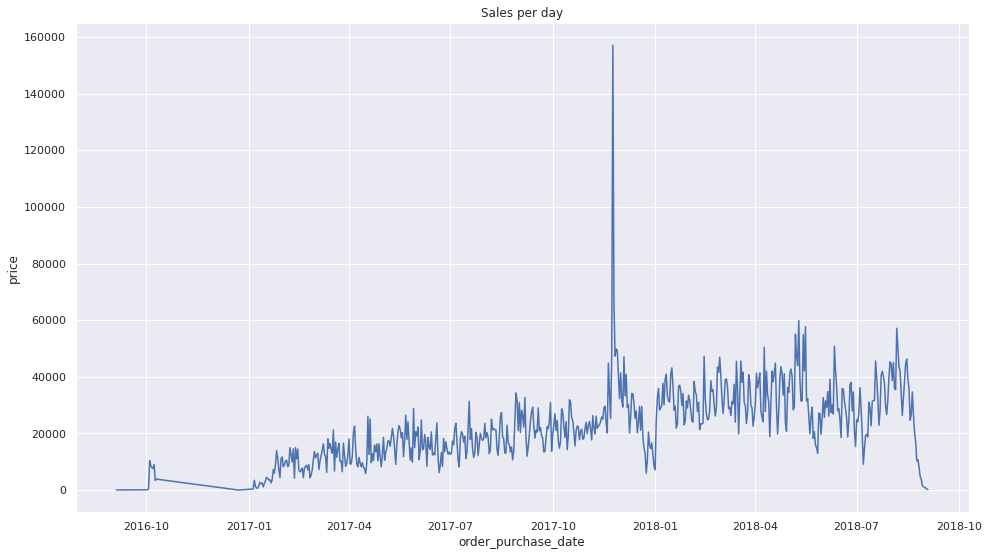

In [30]:
# creating a purchase day feature
ord_final['order_purchase_date'] = ord_final.order_purchase_timestamp.dt.date

# creating an aggregation
sales_per_purchase_date = ord_final.groupby('order_purchase_date', as_index=False).price.sum()
ax = sns.lineplot(x="order_purchase_date", y="price", data=sales_per_purchase_date)
ax.set_title('Sales per day')
plt.show()

[]

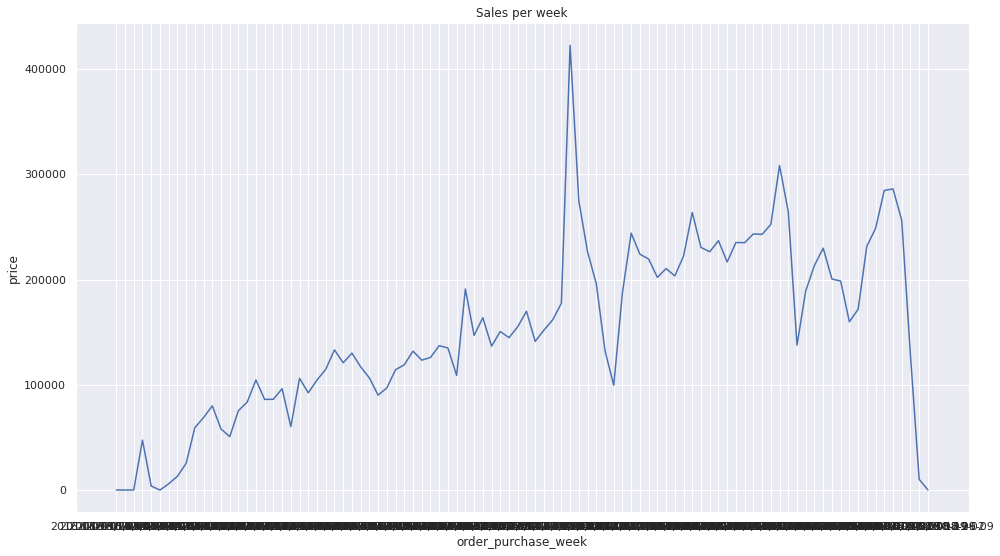

In [31]:
# creating a purchase day feature
ord_final['order_purchase_week'] = ord_final.order_purchase_timestamp.dt.to_period('W').astype(str)

# creating an aggregation
sales_per_purchase_month = ord_final.groupby('order_purchase_week', as_index=False).price.sum()
ax = sns.lineplot(x="order_purchase_week", y="price", data=sales_per_purchase_month)
ax.set_title('Sales per week')
ax.plot()

[]

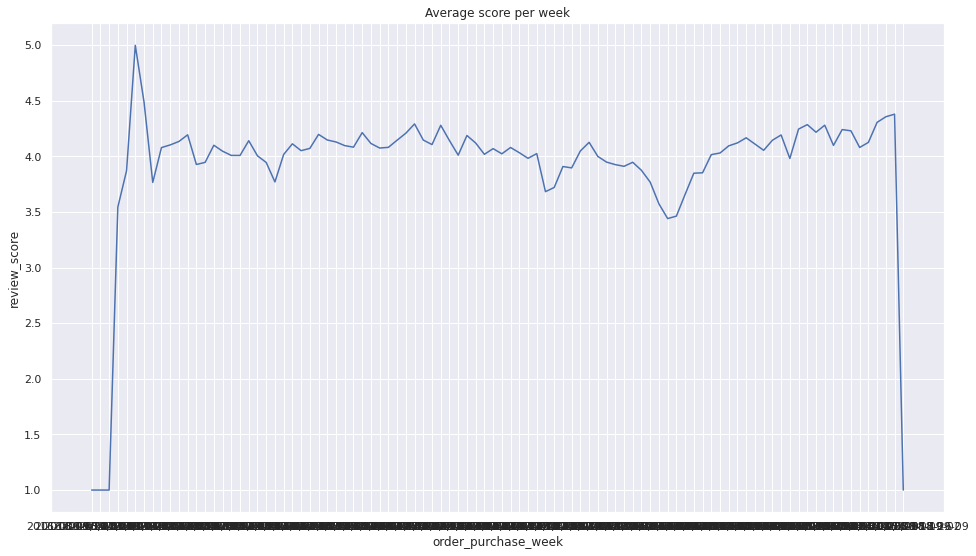

In [32]:
# creating an aggregation
avg_score_per_date = ord_final.groupby('order_purchase_week', as_index=False).review_score.mean()
ax = sns.lineplot(x="order_purchase_week", y="review_score", data=avg_score_per_date)
ax.set_title('Average score per week')
ax.plot()

In [35]:
avg_score_per_category = ord_final.groupby('product_category_name_english', as_index=False).agg({'review_score': ['count', 'mean']})
avg_score_per_category.columns = ['product_category_name', 'count', 'mean']

# filtering to show only categories with more than 50 reviews
avg_score_per_category = avg_score_per_category[avg_score_per_category['count'] > 100]
avg_score_per_category = avg_score_per_category.sort_values(by='mean', ascending=False)
x= avg_score_per_category.head(5)

[]

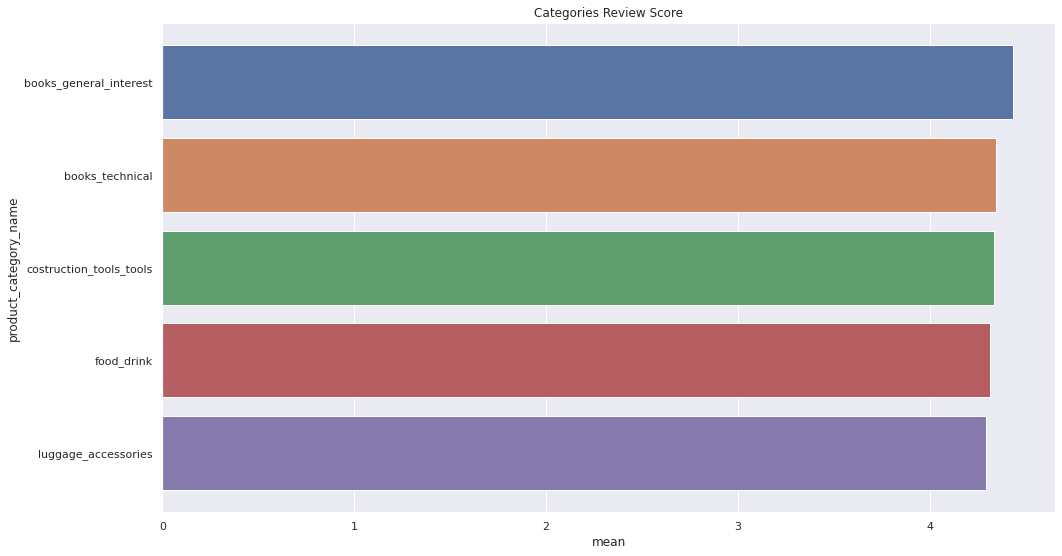

In [36]:
ax = sns.barplot(x="mean", y="product_category_name", data=x)
ax.set_title('Categories Review Score')
ax.plot()

In [35]:
(ord_final['order_estimated_delivery_date'] - ord_final['order_delivered_customer_date']).describe()

count                        116580
mean     11 days 09:20:47.261117265
std      10 days 04:24:26.603060446
min             -189 days +00:35:53
25%                 6 days 12:20:20
50%                12 days 01:13:50
75%         16 days 07:51:18.250000
max               146 days 00:23:13
dtype: object

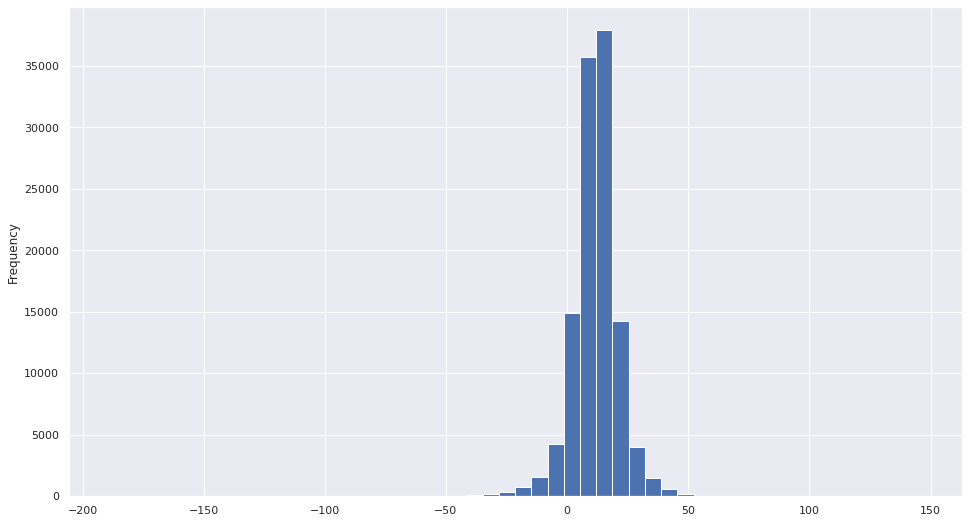

In [36]:
((ord_final['order_estimated_delivery_date'] - ord_final['order_delivered_customer_date']) / (np.timedelta64(1, 'D'))).plot(kind='hist', bins=50)
plt.show()

In [37]:
#On average more items came earlier than estimated delivery date 
ord_final['delivery_accuracy'] = ((ord_final['order_estimated_delivery_date'] - ord_final['order_delivered_customer_date']) 
                               / (np.timedelta64(1, 'D')))

In [38]:
ord_final['total_value'] = ord_final['price'].add(ord_final['freight_value'])

(0.0, 600.0)

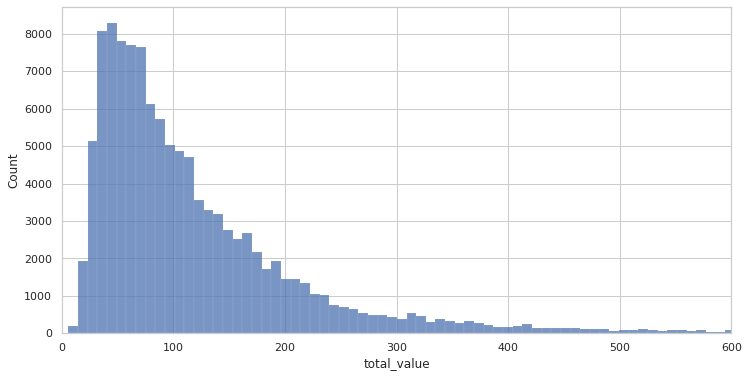

In [39]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.histplot(ord_final['total_value'], bins=800 ,kde=False, color='b')
plt.xlim([0, 600])

As it was expected, we got right skewed histogram for total_value column - most of the times, people buy cheaply priced goods on olist

In [40]:
ord_final_cust = ord_final.merge(cust,left_on='customer_id',right_on='customer_id')

In [41]:
state_grouped = (ord_final_cust.groupby('customer_state')[['price', 'review_score']]
                             .agg({'review_score': ['mean', 'count'], 'price':['mean']})
                ).sort_values(by=('review_score','mean'), ascending=False)
                 
state_grouped.head()

review_score              price
                       mean  count        mean
customer_state                                
AP                 4.226190     84  162.551190
TO                 4.149701    334  166.885988
SP                 4.117131  49133  109.945161
PR                 4.094110   5908  118.520140
MS                 4.075561    847  142.529528

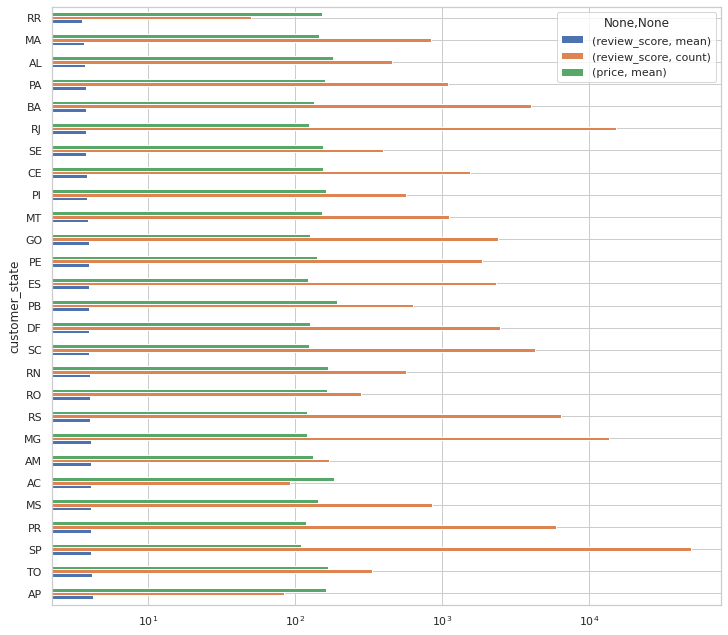

In [42]:
state_grouped.plot(kind='barh', figsize=(12,11), logx=True)
plt.show()

In [43]:
pweekday = ord_final['order_purchase_timestamp'].dt.weekday
phour = ord_final['order_purchase_timestamp'].dt.hour
pprice = ord_final['total_value']
purchase = pd.DataFrame({'day of week': pweekday, 'hour': phour, 'price': pprice})
purchase['day of week'] = purchase['day of week'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
purchase.head()

,day of week,hour,price
0,Wed,8,72.19
1,Wed,11,73.86
2,Fri,10,83.23
3,Tue,18,75.07
4,Thu,21,72.19


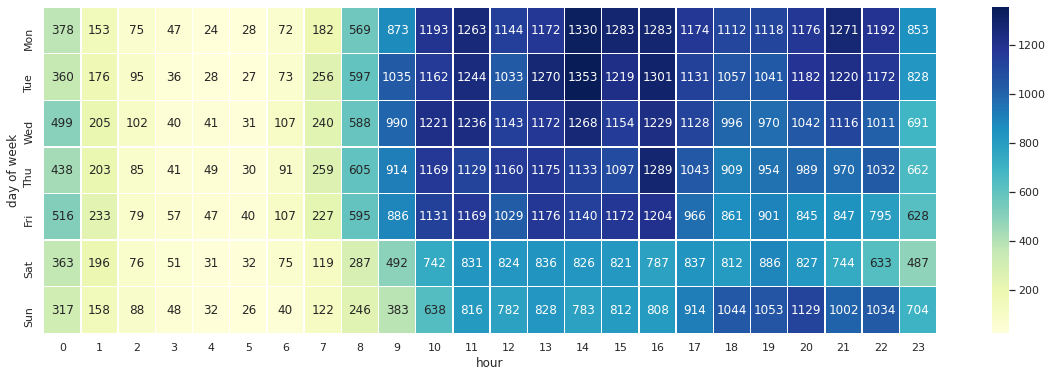

In [46]:
purchase_count = purchase.groupby(['day of week', 'hour']).count()['price'].unstack()
plt.figure(figsize=(20,6))
sns.heatmap(purchase_count.reindex(index = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']), 
            cmap="YlGnBu", annot=True, fmt="d", linewidths=0.5)

The most frequently, customers tend to shop online on weekdays from 10am to 4pm. There are sudden peaks around 8-9pm too (Mon-Thu) and intuitively, on sunday nights (5-9pm), online buyers restart their shopping habbits from relatively low Saturday

#### Data Modeling

In [47]:
ord_final_cust.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'product_category_name_english',
       'order_purchase_date', 'order_purchase_week', 'delivery_accuracy',
       'total_value', 'customer_unique_id', 'customer_zip_code_prefix',
      

In [48]:
model_df = ord_final_cust[['order_status', 'price',
                 'freight_value', 'order_item_id',
                 'order_purchase_timestamp', 'order_approved_at', 'order_estimated_delivery_date', 
                 'order_delivered_customer_date', 'customer_state', 
                 'product_category_name_english', 'product_name_lenght', 'product_description_lenght', 
                 'product_photos_qty', 'review_score']]

In [185]:
model_df.head(2)

,order_status,price,freight_value,order_item_id,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_state,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,review_score
0,delivered,58.9,13.29,1,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-29,2017-09-20 23:43:48,RJ,cool_stuff,58.0,598.0,4.0,5
1,delivered,55.9,17.96,1,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-26,2017-07-13 20:39:29,GO,cool_stuff,58.0,598.0,4.0,5


In [187]:
model_df['order_status'].unique()

array(['delivered', 'shipped', 'invoiced', 'processing', 'canceled',
       'unavailable', 'approved'], dtype=object)

##### Class Balances

In [50]:
# We keep the same proportion of classes
model_df['review_score'].value_counts() / len(model_df['review_score'])

5    0.561657
4    0.188857
1    0.129611
3    0.084423
2    0.035452
Name: review_score, dtype: float64

In [51]:
train_set, test_set = train_test_split(model_df, test_size=0.2, random_state=42)

In [52]:
test_set['review_score'].value_counts() / len(test_set['review_score'])

5    0.559916
4    0.190256
1    0.130383
3    0.083462
2    0.035984
Name: review_score, dtype: float64

Now lets do a stratified shuffle split and compare to the full dataset again

In [53]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(model_df, model_df['review_score']):
    strat_train_set = model_df.loc[train_index]
    strat_test_set = model_df.loc[test_index]

In [54]:
strat_test_set['review_score'].value_counts() / len(strat_test_set['review_score'])

5    0.561674
4    0.188840
1    0.129611
3    0.084406
2    0.035469
Name: review_score, dtype: float64

By doing a stratified split we keep the same proportion between classes. This split better represents the original data and will possibly reduce bias.

Split X and y

In [55]:
#X Train
orders_features = strat_train_set.drop('review_score', axis=1)
#y Train
orders_labels = strat_train_set['review_score'].copy()

Feature Engineering

In [57]:
corr_matrix = strat_train_set.corr()
corr_matrix['review_score'].sort_values(ascending=False)

review_score                  1.000000
product_photos_qty            0.022787
product_description_lenght    0.009918
product_name_lenght          -0.004798
price                        -0.005871
freight_value                -0.039021
order_item_id                -0.131426
Name: review_score, dtype: float64

It's clear that we have to create more informative features to model this problem.

In [261]:
from sklearn.base import BaseEstimator, TransformerMixin

class AttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass    
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        df = X.copy()
        
        # Calculate the estimated delivery time and actual delivery time in working days. 
        # This would allow us to exclude hollidays that could influence delivery times.
        # If the order_delivered_customer_date is null, it returns 0.
        df['wd_estimated_delivery_time'] = (df['order_estimated_delivery_date'] - df['order_approved_at']) / (np.timedelta64(1, 'D'))
        
        df['wd_actual_delivery_time'] = (df['order_delivered_customer_date'] - df['order_approved_at']) / (np.timedelta64(1, 'D'))
         

        # Calculate the time between the actual and estimated delivery date. If negative was delivered early, if positive was delivered late.
        df['wd_delivery_time_delta'] = df.wd_actual_delivery_time - df.wd_estimated_delivery_time
        
        # Calculate the average product value.
        df['average_product_value'] = df.price / df.order_item_id

        # Calculate the total order value
        df['total_order_value'] = df.price + df.freight_value
        
        # Calculate the order freight ratio.
        df['order_freight_ratio'] = df.freight_value / df.price


        # Calculate the time between the actual and estimated delivery date. If negative was delivered early, if positive was delivered late.
        #df['is_late'] = df.order_delivered_customer_date > df.order_estimated_delivery_date
        
        # Calculate the order freight ratio.
        #df['purchase_dayofweek'] = df.order_purchase_timestamp.dt.dayofweek
        df['order_status_cat'] = df['order_status'].astype('category').cat.codes
        
        
        # With that we can remove the timestamps from the dataset
        cols2drop = ['order_purchase_timestamp', 'order_approved_at', 'order_estimated_delivery_date', 
                     'order_delivered_customer_date','order_item_id','price','product_name_lenght','order_status']
        df.drop(cols2drop, axis=1, inplace=True)
        

        
        return df

In [262]:
# Executing the estimator we just created
attr_adder = AttributesAdder()
feat_eng = attr_adder.transform(strat_train_set)
feat_eng.head(3)

,freight_value,customer_state,product_category_name_english,product_description_lenght,product_photos_qty,review_score,wd_estimated_delivery_time,wd_actual_delivery_time,wd_delivery_time_delta,average_product_value,total_order_value,order_freight_ratio,order_status_cat
90306,15.23,RS,cine_photo,300.0,1.0,5,27.892222,11.657269,-16.234954,10.0,25.23,1.523000,2
110121,19.32,MG,home_appliances,190.0,1.0,1,33.340150,6.075266,-27.264884,40.0,59.32,0.483000,2
60796,18.40,PR,sports_leisure,799.0,1.0,4,20.552639,4.200058,-16.352581,43.0,61.40,0.427907,2


##### Dealing with Categorical and Numerical Attributes

In [263]:
# selecting the numerical and text attributes
cat_attribs = ['customer_state', 'product_category_name_english','product_photos_qty']
num_attribs = orders_features.drop(cat_attribs, axis=1).columns

In [264]:
x = feat_eng.drop(cat_attribs, axis=1)
final_columns = x.drop('review_score', axis=1).columns
final_columns

Index(['freight_value', 'product_description_lenght',
       'wd_estimated_delivery_time', 'wd_actual_delivery_time',
       'wd_delivery_time_delta', 'average_product_value', 'total_order_value',
       'order_freight_ratio', 'order_status_cat'],
      dtype='object')

In [265]:
num_attribs

Index(['order_status', 'price', 'freight_value', 'order_item_id',
       'order_purchase_timestamp', 'order_approved_at',
       'order_estimated_delivery_date', 'order_delivered_customer_date',
       'product_name_lenght', 'product_description_lenght'],
      dtype='object')

In [266]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.attribute_names]

Creating pipelines to handle unseen data

In [267]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('selector', DataFrameSelector(num_attribs)),
                         ('attribs_adder', AttributesAdder()),
                         ('std_scaller', StandardScaler())
                        ])

In [268]:
# lets see how the resulting data looks like
orders_features_prepared = num_pipeline.fit_transform(orders_features)
orders_features_prepared

array([[-0.3053029 , -0.74315415,  0.49753199, ..., -0.60712004,
         3.33877789, -0.10759662],
       [-0.04792166, -0.91184207,  1.10851276, ..., -0.4278693 ,
         0.44466092, -0.10759662],
       [-0.10581671,  0.02207562, -0.32559636, ..., -0.41693232,
         0.29134779, -0.10759662],
       ...,
       [-0.05232672, -1.06059415,  0.3779607 , ..., -0.38091391,
         0.19381095, -0.10759662],
       [-1.08751532,  0.58334635,  0.71713284, ..., -0.44111987,
        -0.7551402 , -0.10759662],
       [ 0.45362564, -0.28769675,  0.31345674, ...,  0.13459628,
        -0.35308312, -0.10759662]])

### Linear Regression

In [269]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(orders_features_prepared, orders_labels)

LinearRegression()

In [270]:
some_data = orders_features.iloc[:8]
some_labels = orders_labels.iloc[:8]
some_data_prepared = num_pipeline.transform(some_data)

In [271]:
some_data_prepared

array([[-0.3053029 , -0.74315415,  0.49753199, -0.04266034, -0.47429158,
        -0.57626705, -0.60712004,  3.33877789, -5.98110623],
       [-0.04792166, -0.91184207,  1.10851276, -0.64189807, -1.55656233,
        -0.41130801, -0.4278693 ,  0.44466092, -5.98110623],
       [-0.10581671,  0.02207562, -0.32559636, -0.84320497, -0.48583332,
        -0.39481211, -0.41693232,  0.29134779, -5.98110623],
       [-0.28264832,  1.30870442, -0.33893095,  1.85612254,  1.99306305,
         0.02803291, -0.02735511, -0.53759954, -5.98110623],
       [-0.2845362 ,  1.03573669, -0.34429049, -0.64785708, -0.29092633,
        -0.35637665, -0.39511095, -0.0332517 , -5.98110623],
       [-0.34998277,  0.71522964,  0.23686689,  0.10365737, -0.1124944 ,
        -0.53530223, -0.4799251 ,  0.25834058, -5.98110623],
       [ 0.7814878 ,  1.5034623 ,  1.62407325,  0.04521543, -1.37960207,
        -0.38408977, -0.09618445,  0.10658574, -3.04435142],
       [-0.72126622, -0.55759743, -1.35881235, -0.66481593,  0

In [272]:
print('Predicted: {} \n Labels: {}'.format(list(lin_reg.predict(some_data_prepared)), list(some_labels.values)))

Predicted: [5.378002591467221, 5.813033273898545, 5.789527029863785, 4.633321005151231, 5.72341542358237, 5.3279532296276875, 4.688182303169263, 5.615832478259216] 
 Labels: [5, 1, 4, 3, 5, 5, 1, 5]


Looks like we are not even close to predicting the right values. Lets see whats the root mean squared error.

In [273]:
from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(orders_features_prepared)
lin_mse = mean_squared_error(orders_labels, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.3059763838361371

A typical prediction error of about 1.25 is not at all satisfying when we are trying to predict values that range from 1 to 5. So let's try a different model.

### Tree - based models

#### Random forest

In [275]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_jobs=-1)
forest_reg.fit(orders_features_prepared, orders_labels)

predictions = forest_reg.predict(orders_features_prepared)
forest_mse = mean_squared_error(orders_labels, predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.4421222613543888

Much better! We got a typical error of 0.45 with Random Forest. Looks like it's a good algorithm! Let's see some examples of predictions.

Randomized Search CV

In [277]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [278]:
random_grid = {
               'max_depth': [100,150,200,250,300],
               'n_estimators': [1000,1500,2000,2500]}

In [ ]:
rf_random = RandomizedSearchCV(estimator = forest_reg, param_distributions = random_grid, cv = 5, verbose=2, 
                               random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(orders_features_prepared, orders_labels)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
print(rf_random.best_params_)
print(rf_random.best_score_)
print(rf_random.best_estimator_)

In [279]:
bestforest_reg = RandomForestRegressor(n_estimators = 2000, max_depth = 300,n_jobs=-1)
bestforest_reg.fit(orders_features_prepared, orders_labels)

predictions = bestforest_reg.predict(orders_features_prepared)
forest_mse = mean_squared_error(orders_labels, predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.432437385868357

After Grid search we can see that we have significantly reduced the RMSE

#### Gradient Boosting

In [287]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(orders_features_prepared, orders_labels)

gbr_pred = gbr.predict(orders_features_prepared)
gbr_mse = mean_squared_error(orders_labels, gbr_pred)
gbr_rmse = np.sqrt(gbr_mse)
gbr_rmse

1.2179965123249512

Randomized Search CV

In [290]:
param_dist = {"learning_rate": np.linspace(0.05, 0.15,5),
               "max_depth": range(3, 5),
               "min_samples_leaf": range(3, 5),
              "min_samples_split": [50, 100],
             'n_estimators' : [500,1000]}

rand = RandomizedSearchCV(gbr, param_dist, cv=7,n_iter=10, random_state=5,n_jobs=-1)
rand.fit(orders_features_prepared, orders_labels)

print(rand.best_score_)
print(rand.best_params_)

0.26586611390129844
{'n_estimators': 1000, 'min_samples_split': 100, 'min_samples_leaf': 4, 'max_depth': 4, 'learning_rate': 0.125}


In [292]:
gbr_best = GradientBoostingRegressor(n_estimators= 1000, min_samples_split= 100, min_samples_leaf= 4, max_depth= 4,
                                     learning_rate= 0.125)
gbr_best.fit(orders_features_prepared, orders_labels)

gbr_pred_best = gbr_best.predict(orders_features_prepared)
gbr_mse_best = mean_squared_error(orders_labels, gbr_pred_best)
gbr_rmse_best = np.sqrt(gbr_mse_best)
gbr_rmse_best

1.1191182498088796

##### Neural Network

In [176]:
# Regression Example With Boston Dataset: Baseline
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [177]:
y = np.array(orders_labels)

In [178]:
y_train=np.reshape(y, (-1,1))
y_train

array([[5],
       [1],
       [4],
       ...,
       [5],
       [5],
       [5]])

In [180]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=9, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, orders_features_prepared, orders_labels, cv=kfold , n_jobs=-1)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: -1.64 (0.02) MSE


##### Tune the NN model

In [181]:
# define the model
def larger_model():
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=9, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


estimator = KerasRegressor(build_fn=larger_model, epochs=50, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, orders_features_prepared, orders_labels, cv=kfold , n_jobs=-1)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: -1.64 (0.02) MSE


RF has the lowest RMSE hence we shall now test the model on Test Data

## Model Testing

In [280]:
X_test = strat_test_set.drop('review_score', axis=1)
#y Train
y_test = strat_test_set['review_score'].copy()

In [281]:
# Executing the estimator we just created
attr = AttributesAdder()
feat_eng_test = attr.transform(strat_test_set)
feat_eng_test.head(3)

,freight_value,customer_state,product_category_name_english,product_description_lenght,product_photos_qty,review_score,wd_estimated_delivery_time,wd_actual_delivery_time,wd_delivery_time_delta,average_product_value,total_order_value,order_freight_ratio,order_status_cat
108360,18.21,SP,luggage_accessories,1345.0,2.0,4,26.048414,14.484387,-11.564028,110.90,129.11,0.164202,1
48074,7.39,SP,housewares,215.0,2.0,5,13.877014,1.635938,-12.241076,17.99,25.38,0.410784,1
49623,35.12,SP,housewares,106.0,1.0,5,6.794699,3.526377,-3.268322,115.00,150.12,0.305391,1


In [282]:
# lets see how the resulting data looks like
X_test_prepared = num_pipeline.fit_transform(X_test)
X_test_prepared

array([[-0.11341568,  0.84573047,  0.3048347 , ..., -0.06248245,
        -0.48549372, -0.10576883],
       [-0.80423014, -0.88032671, -1.07572276, ..., -0.59760145,
         0.29952418, -0.10576883],
       [ 0.96622132, -1.0468225 , -1.87904384, ...,  0.04590327,
        -0.03600332, -0.10576883],
       ...,
       [-0.17343099, -0.07534252, -0.43512122, ...,  1.21720153,
        -0.85548042, -0.10576883],
       [ 0.48035275,  0.71131186,  1.60257518, ..., -0.25134494,
         0.33935779, -0.10576883],
       [-0.71356872, -0.61301697, -1.38065321, ...,  0.08557419,
        -0.82000885,  5.94602537]])

##### RF Testing

In [283]:
#testing the predictions and rmse score
predictions_test = bestforest_reg.predict(X_test_prepared)
forest_mse_test = mean_squared_error(y_test, predictions_test)
forest_rmse_test = np.sqrt(forest_mse_test)
forest_rmse_test

1.210675998329534

In [284]:
print(f'Test score is : {bestforest_reg.score(X_test_prepared,y_test)}')

Test score is : 0.24993494970445262


RF model has been overfitted hence we will test the GBM model next on new data

##### GBM Testing

In [293]:
gbr_pred_best = gbr_best.predict(X_test_prepared)
gbr_mse_best = mean_squared_error(y_test, gbr_pred_best)
gbr_rmse_best = np.sqrt(gbr_mse_best)
gbr_rmse_best

1.237611764689012

According to the current model GBM is performing the best with the lowest RMSE score